#step1

In [56]:
!pip install japanize-matplotlib
import japanize_matplotlib as jm
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("sample_pandas_6.csv")



In [22]:
def tax(x):
    return x * 1.10

df['単価'].apply(tax)

0      858.0
1      858.0
2      858.0
3      858.0
4      858.0
       ...  
195    330.0
196    330.0
197    330.0
198    330.0
199    330.0
Name: 単価, Length: 200, dtype: float64

In [23]:
type(pd.to_datetime(df['発注日']).loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込み）"
pd.concat([df, tax_series], axis=1)


,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー_x,カテゴリー_y,単価（税込み）
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当,弁当,858.0
1,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当,弁当,858.0
2,2021-12-11,YY4HAAZR,商品サンプル YY4HAAZR,780,50,36,弁当,弁当,858.0
3,2016-09-15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54,弁当,弁当,858.0
4,2024-01-18,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当,弁当,858.0
...,...,...,...,...,...,...,...,...,...
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート,デザート,330.0
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート,デザート,330.0
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート,デザート,330.0
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート,デザート,330.0


In [25]:
category_df = pd.read_csv('category.csv')



#step2

In [61]:
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')


In [62]:
value_counts = df['カテゴリー'].value_counts()

<Axes: >

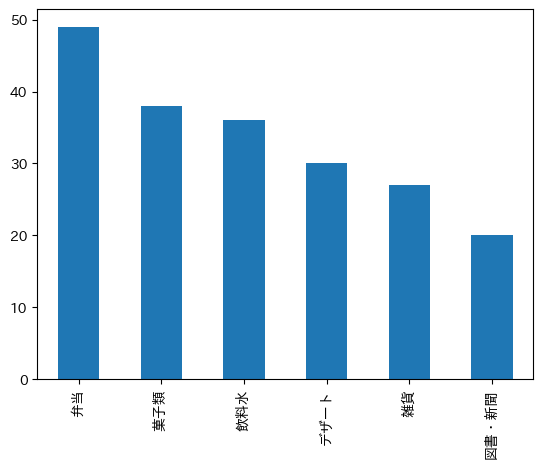

In [63]:
value_counts.plot(kind='bar')

#step3


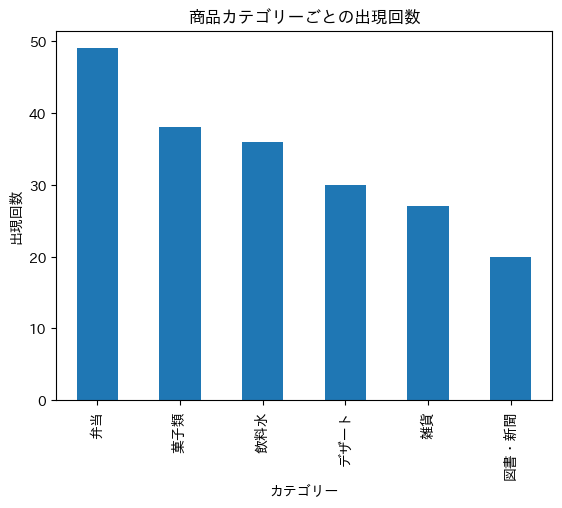

In [70]:
plt.title('商品カテゴリーごとの出現回数')
plt.xlabel('カテゴリー')
plt.ylabel('出現回数')
plt.show(value_counts.plot(kind='bar'))

#step4

In [16]:
price_aggregated = df.groupby('商品番号')['注文数'].describe()


In [36]:
print(price_aggregated)

          count       mean        std  min   25%   50%   75%   max
商品番号                                                              
1QJFO8QY   32.0  35.250000  18.461818  0.0  24.0  36.0  49.5  60.0
2HSTCDWM   20.0  29.400000  21.137146  0.0  12.0  27.0  48.0  60.0
48XMJXKO   10.0  21.600000  13.326665  0.0  13.5  21.0  30.0  42.0
8T7D5DQA   21.0  25.142857  18.260027  0.0  12.0  36.0  42.0  54.0
MESUDVWQ   17.0  43.764706  18.219253  0.0  42.0  48.0  54.0  60.0
QRMOGNUU   27.0  33.111111  16.588535  6.0  21.0  36.0  48.0  60.0
S6RE8W6X   20.0  33.300000  21.631118  0.0  12.0  39.0  54.0  60.0
X0ZE2ZMY   14.0  21.857143  21.901377  0.0   1.5  15.0  39.0  60.0
YY4HAAZR   17.0  31.764706  18.095336  0.0  18.0  30.0  42.0  60.0
Z4WOOIYV   22.0  26.727273  19.218498  0.0  12.0  24.0  42.0  60.0
